# 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기
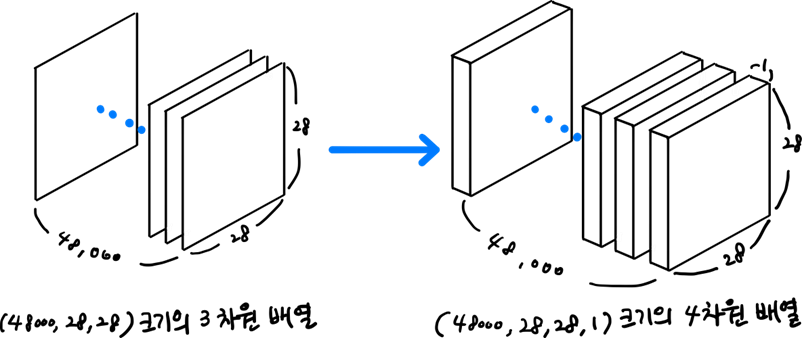

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기
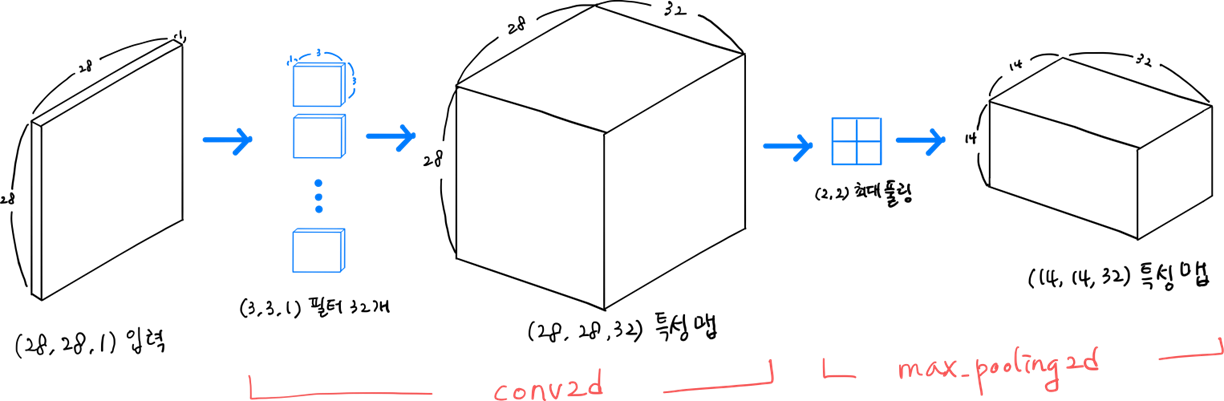

### 첫번째 합성곱 - 풀링 층 추가

### 두번째 합성곱 - 풀링 층 추가

### 세번째 : 3차원 특성맵을 일렬로 펼침
    - 마지막에 10개의 뉴런을 가진 출력(밀집)층에서 확률을 계산해야 하기 때문에 일렬로 펼쳐야 한다
### 네번째 : 은닉층 추가 - Dorpout(과대적합 방지)
### 다섯번째 : 최종 출력층 추가

- 합성곱 층과 풀링층 효과가 잘 나타나 있음
    - 첫번째 합성곱 층을 통과하면 
        - 특성 맵의 깊이는 32가 됨
    - 두번째 합성곱에서 맾의 깊이는 64로 늘어남
    - but, 특성맵의 가로 세로 크기는 첫번재 풀링층에서 절반으로 줄어들고 두번째 풀링층에서 절반으로 줄어들어 (7,7,64)가 됨
- 파라미터 갯수
    - 첫번째 합성곱 층
        - 32개의 필터, 크기가 (3,3), 깊이가 1, 필터마다 절편 이므로 9 X 9 X 1 X 32 + 32 =320
    - 두번째 합성곱 층
        - 64개의 필터, 크기가 (3,3), 깊이가 32, 필터마다 절편 => 9 x 9 x 64 X 62 + 64 = 18,496
- flattern 층에서 (7,7,64)를 1차원으로 펼치면 (3136,)zmrldml qodufdl ehla
    - 이를 100개의 뉴런에 연결해야 하므로 은닉층의 모델 파라미터개수는 3,316 X 100 + 100 = 313,700임

- 모델 구성을 그림으로 출력해주는 plot_model()

- 맨 처음 InputLayer 클래스는 케라스가 자동으로 추가해 준 입력 층 임

## 모델 컴파일과 훈련

### 결과 시각화

- 7번째(6번)에포크에서 손실 최저를 찍고 다시 증가하고 있는것을 볼 수 있음
    - 최적 에포크는 7번

- 92 퍼센트의 정확도가 나옴

### predict() 이용 예측 진행 해 봄

- 최종 테스트 정확도 : 91.6%